In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install torchaudio

In [ ]:
import pandas as pd
import os
import wave
import numpy as np
import pickle
import librosa
import torchaudio
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/project/"
df_train = pd.read_csv(path +"FSDKaggle2018.meta/train_post_competition.csv")
df_test = pd.read_csv(path+ "FSDKaggle2018.meta/test_post_competition_scoring_clips.csv")
train_path = path+ 'FSDKaggle2018.audio_train/'
test_path = path+'FSDKaggle2018.audio_test/'

Lable:  Saxophone


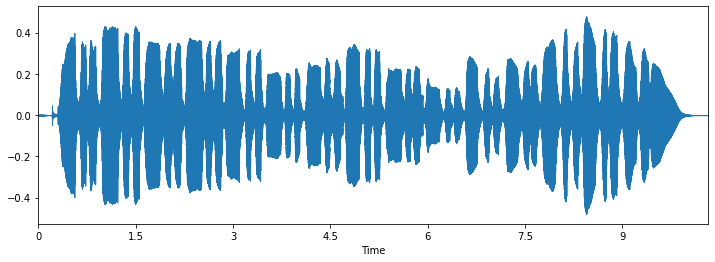

In [ ]:
sample_wav = os.path.join( train_path + df_train.iloc[1].fname)
print("Lable: ", df_train.iloc[1].label)
sig, sr=librosa.load(sample_wav)
plt.figure(figsize =(12,4))
librosa.display.waveplot(sig,sr)

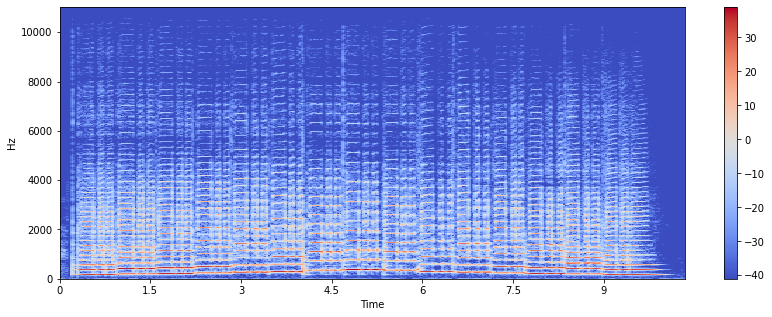

In [ ]:
X = librosa.stft(sig)
Xdb = librosa.amplitude_to_db(abs(X)) 
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

(20, 445)


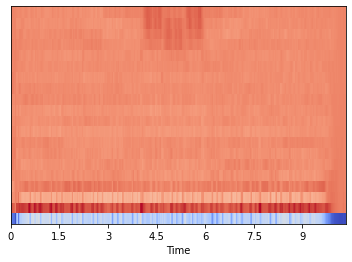

In [ ]:
mfccs = librosa.feature.mfcc(sig, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
label_counts = df_train.label.value_counts()
df_train.label.value_counts()/np.array(label_counts).sum()


Violin_or_fiddle         0.031669
Double_bass              0.031669
Clarinet                 0.031669
Fart                     0.031669
Tearing                  0.031669
Saxophone                0.031669
Flute                    0.031669
Squeak                   0.031669
Snare_drum               0.031669
Laughter                 0.031669
Hi-hat                   0.031669
Cello                    0.031669
Shatter                  0.031669
Applause                 0.031669
Acoustic_guitar          0.031669
Fireworks                0.031669
Trumpet                  0.031669
Bass_drum                0.031669
Oboe                     0.031563
Gong                     0.030824
Knock                    0.029452
Writing                  0.028502
Cough                    0.025652
Bark                     0.025230
Tambourine               0.023329
Burping_or_eructation    0.022168
Cowbell                  0.020163
Harmonica                0.017418
Drawer_open_or_close     0.016679
Meow          

In [ ]:
def parser_train(row):
    temp = []
    file_name=os.path.join(train_path,str(row.fname))
    try:
        sig, sr=librosa.load(file_name)
        a = librosa.feature.zero_crossing_rate(sig,sr)
        b = np.mean(a)
        temp.append(b)
        #spectral_centroid
        a = librosa.feature.spectral_centroid(sig,sr=sr)[0]
        b = np.mean(a)
        temp.append(b)
        #MFCC
        a = librosa.feature.mfcc(sig,sr,n_mfcc=40)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k])
        #chroma_stft
        a = librosa.feature.chroma_stft(sig,sr)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k])
        #spectral_contrast
        a = librosa.feature.spectral_contrast(sig,sr)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k]) 
        #spectral_bandwidth
        a = librosa.feature.spectral_bandwidth(sig,sr)
        b = np.mean(a,axis=1)
        for k in range(len(b)):
            temp.append(b[k]) 
        #tonnetz
        a = librosa.feature.tonnetz(sig,sr)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k])
            
    except Exception as e:
        print("error",file)
        return None,None
    label=row.label
    return [temp,label]

In [ ]:
temp=df_train.apply(parser_train,axis=1,result_type='expand')
data_train = df_train.assign(features=temp[0],label = temp[1])
with open (path + "pickle/train_data.plk",'wb')  as f:
    pickle.dump(data_train,f)

In [ ]:
def parser_test(row):
    temp = []
    file_name=os.path.join(test_path,str(row.fname))
    try:
        sig, sr=librosa.load(file_name)
        a = librosa.feature.zero_crossing_rate(sig,sr)
        b = np.mean(a)
        temp.append(b)
        #spectral_centroid
        a = librosa.feature.spectral_centroid(sig,sr=sr)[0]
        b = np.mean(a)
        temp.append(b)
        #MFCC
        a = librosa.feature.mfcc(sig,sr,n_mfcc=40)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k])
        #chroma_stft
        a = librosa.feature.chroma_stft(sig,sr)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k])
        #spectral_contrast
        a = librosa.feature.spectral_contrast(sig,sr)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k]) 
        #spectral_bandwidth
        a = librosa.feature.spectral_bandwidth(sig,sr)
        b = np.mean(a,axis=1)
        for k in range(len(b)):
            temp.append(b[k]) 
        #tonnetz
        a = librosa.feature.tonnetz(sig,sr)
        b = np.mean(a,axis = 1)
        for k in range(len(b)):
            temp.append(b[k])
            
    except Exception as e:
        print("error",file)
        return None,None
    label=row.label
    return [temp,label]

In [ ]:
temp_test=df_test.apply(parser_test,axis=1,result_type='expand')
data_train = df_test.assign(features=temp_test[0],label = temp_test[1])
with open (path + "pickle/test_data.plk",'wb')  as f:
    pickle.dump(data_train,f)
